# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [1]:
#Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
schema = pd.read_csv('schema.csv')
df = pd.read_csv('multipleChoiceResponses_cleaned.csv')

schema

/Users/kaigraham/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All
...,...,...,...
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


In [4]:
df.describe()

,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect,CompensationAmount,exchangeRate,AdjustedCompensation
count,16236.000000,16253.000000,16238.000000,16249.000000,16253.000000,16221.000000,10657.000000,10655.000000,10644.000000,10656.000000,10650.000000,10640.000000,5.178000e+03,4499.000000,4.343000e+03
mean,33.596945,25.814680,13.760184,21.133270,4.467212,1.449728,35.680304,27.455279,10.007657,13.639968,9.249953,2.254041,4.129494e+07,0.703416,6.636071e+06
std,23.781350,24.558786,17.845975,23.784604,10.186693,8.437395,19.364950,17.450835,10.458430,9.947624,12.429025,10.302431,1.965335e+09,0.486681,4.293996e+08
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.900000e+01,0.000030,-7.351631e+01
25%,20.000000,10.000000,0.000000,0.000000,0.000000,0.000000,25.000000,15.000000,5.000000,10.000000,0.000000,0.000000,5.000000e+04,0.058444,2.036942e+04
50%,30.000000,20.000000,10.000000,15.000000,0.000000,0.000000,30.000000,30.000000,10.000000,10.000000,5.000000,0.000000,9.000000e+04,1.000000,5.381217e+04
75%,50.000000,35.000000,20.000000,40.000000,5.000000,0.000000,50.000000,40.000000,10.000000,15.000000,15.000000,0.000000,1.900000e+05,1.000000,9.566608e+04
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000,1.000000e+11,2.652053,2.829740e+10


In [5]:
df.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorTitle', 'JobFactorCompanyFunding', 'JobFactorImpact',
       'JobFactorRemote', 'JobFactorIndustry', 'JobFactorLeaderReputation',
       'JobFactorDiversity', 'JobFactorPublishingOpportunity', 'exchangeRate',
       'AdjustedCompensation'],
      dtype='object', length=230)

In [8]:
df['FormalEducation'].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [9]:
df['AdjustedCompensation'].value_counts()

100000.000000    60
120000.000000    59
150000.000000    58
71749.560000     47
50000.000000     45
                 ..
70786.560000      1
6880.782804       1
36344.944000      1
106563.600000     1
48126.250000      1
Name: AdjustedCompensation, Length: 1627, dtype: int64

## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [51]:
#Your code here
# Null Hypothesis: salaries of those with master's degrees = salaries of those with bachelor's degrees
# Alternative Hypothesis: salaries of those with master's degrees > salaries of those with bachelor's degrees

alpha = 0.05

In [19]:
import scipy.stats as stats

In [25]:
#split datasets into masters and bachelors
masters = df.loc[df['FormalEducation'] == "Master's degree"]['AdjustedCompensation']
bachelors = df.loc[df['FormalEducation'] == "Bachelor's degree"]['AdjustedCompensation']

In [31]:
# check for NaNs
masters.isna().sum()

# remove NaNs
masters = masters.dropna()
masters.isna().sum()

0

In [32]:
#check for NaNs
bachelors.isna().sum()

#remove NaNs
bachelors = bachelors.dropna()
bachelors.isna().sum()

0

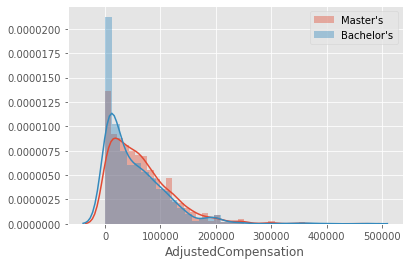

In [63]:
# look at distribution plots of both
plt.style.use('ggplot')
sns.distplot(masters, label="Master's")
sns.distplot(bachelors, label="Bachelor's")
plt.legend()
plt.show()

In [42]:
# show summary statistics, mean, median, standard deviation, sample size

print(f"Master's Mean: {round(masters.mean(), 2)}")
print(f"Master's STD: {round(masters.std(ddof=1), 2)}") #sample standard deviation
print(f"Mater's n: {len(masters)}")
print()
print(f"Bachelor's Mean: {round(bachelors.mean(), 2)}")
print(f"Bachelor's STD: {round(bachelors.std(ddof=1), 2)}") #sample standard deviation
print(f"Bachelor's n: {len(bachelors)}")

Master's Mean: 69139.9
Master's STD: 135527.21
Mater's n: 1990

Bachelor's Mean: 64887.1
Bachelor's STD: 306935.87
Bachelor's n: 1107


In [45]:
# Difference in mean
print(f'Difference in means: {masters.mean() - bachelors.mean()}')

Difference in means: 4252.8018765812085


In [46]:
# variables to help with calculations
n_masters = len(masters)
n_bachelors = len(bachelors)
mean_masters = masters.mean()
mean_bachelors = bachelors.mean()
var_masters = masters.var()
var_bachelors = bachelors.var()
std_masters = masters.std()
std_bachelors = bachelors.std()

pooled_var = (n_masters * var_masters + n_bachelors * var_bachelors) / (n_masters + n_bachelors)

In [48]:
# Cohen's D
d = (masters.mean() - bachelors.mean()) / np.sqrt(pooled_var)
d

0.019942528830367682

With a cohen's D of ~0.2, we are witnessing a "small" effect size

In [49]:
#perform welch's ttest
stats.ttest_ind(masters, bachelors, equal_var=False)

Ttest_indResult(statistic=0.43786693335411514, pvalue=0.6615527890254489)

In [50]:
# We want the p_value of a one-sided test, so we can divide the returned pval by 2
t, pval = stats.ttest_ind(masters, bachelors, equal_var=False)
pval / 2

0.33077639451272445

With an alpha value of 0.05 and a pval of 0.33, we fail to reject the Null Hypothesis that master's and bachelor's salaries are different

In [52]:
# Repeat the above, but remove all outliers
masters.describe()

count    1.990000e+03
mean     6.913990e+04
std      1.355272e+05
min      0.000000e+00
25%      2.186800e+04
50%      5.381217e+04
75%      9.200000e+04
max      4.498900e+06
Name: AdjustedCompensation, dtype: float64

In [53]:
bachelors.describe()

count    1.107000e+03
mean     6.488710e+04
std      3.069359e+05
min      0.000000e+00
25%      1.126620e+04
50%      3.839940e+04
75%      8.023100e+04
max      9.999999e+06
Name: AdjustedCompensation, dtype: float64

In [56]:
# use a cutoff of $500,000 for outliers
masters = masters.loc[masters < 500000]
bachelors = bachelors.loc[bachelors < 500000]

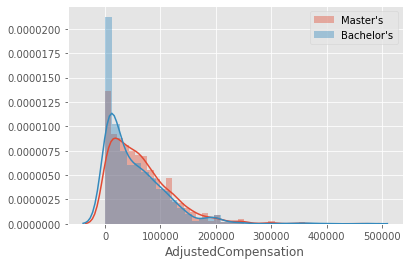

In [64]:
# replot distribution plots
sns.distplot(masters, label="Master's")
sns.distplot(bachelors, label="Bachelor's")
plt.legend()
plt.show()

In [65]:
# show summary statistics, mean, median, standard deviation, sample size

print(f"Master's Mean: {round(masters.mean(), 2)}")
print(f"Master's STD: {round(masters.std(ddof=1), 2)}") #sample standard deviation
print(f"Mater's n: {len(masters)}")
print()
print(f"Bachelor's Mean: {round(bachelors.mean(), 2)}")
print(f"Bachelor's STD: {round(bachelors.std(ddof=1), 2)}") #sample standard deviation
print(f"Bachelor's n: {len(bachelors)}")

Master's Mean: 63756.86
Master's STD: 54481.64
Mater's n: 1984

Bachelor's Mean: 53744.35
Bachelor's STD: 55285.48
Bachelor's n: 1103


In [66]:
# variables to help with calculations
n_masters = len(masters)
n_bachelors = len(bachelors)
mean_masters = masters.mean()
mean_bachelors = bachelors.mean()
var_masters = masters.var()
var_bachelors = bachelors.var()
std_masters = masters.std()
std_bachelors = bachelors.std()

pooled_var = (n_masters * var_masters + n_bachelors * var_bachelors) / (n_masters + n_bachelors)

In [67]:
# Cohen's D
d = (masters.mean() - bachelors.mean()) / np.sqrt(pooled_var)
d

0.18280946735826115

In [68]:
#perform welch's ttest
stats.ttest_ind(masters, bachelors, equal_var=False)

Ttest_indResult(statistic=4.847007852131999, pvalue=1.3389521947456e-06)

In [69]:
# We want the p_value of a one-sided test, so we can divide the returned pval by 2
t, pval = stats.ttest_ind(masters, bachelors, equal_var=False)
pval / 2

6.694760973728e-07

With outliers removed, and an alpha threshold of 0.05, we end up with an extremely small pval.  With a 95% confidence level, we can reject the null hypothesis that masters and bachelors students have the same salaries in favor of the null hypothesis that masters students tend to make more. 

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [11]:
#Your code here
s1 = df.loc[df['FormalEducation'] == 'Doctoral degree']['AdjustedCompensation']
s2 = df.loc[df['FormalEducation'] == "Bachelor's degree"]['AdjustedCompensation']


Median Values: 
s1:74131.92 
s2:38399.4
Sample sizes: 
s1: 967 
s2: 1107
Welch's t-test p-value: 0.1568238199472023


Repeated Test with Ouliers Removed:
Sample sizes: 
s1: 964 
s2: 1103
Welch's t-test p-value with outliers removed: 0.0


In [89]:
subset = df.loc[(~df['AdjustedCompensation'].isnull()) & (~df['FormalEducation'].isnull())]
s1 = subset.loc[subset['FormalEducation'] == 'Doctoral degree']['AdjustedCompensation']
s2 = subset.loc[subset['FormalEducation'] == "Bachelor's degree"]['AdjustedCompensation']

print("Median Values:")
print(f"s1: {round(s1.median(), 2)}")
print(f"s2: {round(s2.median(), 2)}")
print("Sample Size:")
print(f"s1: {len(s1)}")
print(f"s2: {len(s2)}")

p_val = stats.ttest_ind(s1, s2, equal_var=False)[1]
print(f"Welch's t-test p-value: {p_val / 2}") #divide by two for one sided
print()
print("Repeated Test with Outliers Removed:")
print("Sample Sizes:")
print(f"s1: {len(s1)}")
print(f"s2: {len(s2)}")

#remove outliers
s1 = s1.loc[s1 <= 500000]
s2 = s2.loc[s2 <= 500000]
p_val_2 = stats.ttest_ind(s1, s2, equal_var=False)[1]
print(f"Welch's t-test p-value with outliers removed: {round(p_val_2 / 2, 2)}")

Median Values:
s1: 74131.92
s2: 38399.4
Sample Size:
s1: 967
s2: 1107
Welch's t-test p-value: 0.15682381994720257

Repeated Test with Outliers Removed:
Sample Sizes:
s1: 967
s2: 1107
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [90]:
#Your code here
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [92]:
formula = 'AdjustedCompensation ~ C(FormalEducation)'
lm = ols(formula, subset).fit() #use subsetted data that removes NaNs
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [93]:
# rerun with outliers removed
subset_2 = subset.loc[subset['AdjustedCompensation'] <= 500000]
lm = ols(formula, subset_2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!